## Business case

The attached excel sheet contains overall data from a large classifieds site. For examples of classifieds platforms: leboncoin.fr, craigslist.com

Structure of file

Column A - all categories available on the platform in which users can  list/post an ad.

Column B - for each category it is indicated how many ads where posted/listed in 2012

Column C - the average price users ask for their listed ads per category

Column D - revenue made with promotion feature X in 2012 per category

Promotion feature X [$5]

If a user buys this feature his/her ad will get more attention on the platform as it will randomly be shown on the homepage and category page. As a result of this an ad will get up to 7 times more views (average). It costs $5 to buy promotion feature X.

Situation

The classifieds site has hired monetization experts to help monetize their platform (being you). Your assignment is to come up with a data-driven plan leading to a better monetization of the platform using the existing functionality of promotion feature X.

Output

- What can we already learn from the available data?

- How would you proceed to better monetize this platform?

- Can you give an estimate of how much more money can be made a year?

- What additional tests would you perform to strengthen your plan?

## Prerequisites

In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

## Import csv

In [2]:
head = ["categorie","n_ads","ad_price","revenue"]
data = pd.read_excel('case_study.xlsx', sep="\t", header=0)
data.columns = head

## Clean data

We can see that there are some categories that are listed several times. We will regroup these categories

In [3]:
data.head()

,categorie,n_ads,ad_price,revenue
0,accessories,279343,24.96,7606.716274
1,accessories,81975,17.49,1247.014466
2,accessories,84817,6.23,518.619235
3,Accessories & accessories,496293,21.74,9786.574488
4,Accessories CDs,63256,12.57,643.843384


In [14]:
def clean_categorie(data):
    gb = data.groupby(['categorie'])
    for col in ["n_ads","revenue"]:
        # sum on number and revenue
        data[col] = gb[col].transform('sum')

    # mean for the average
    data["ad_price"] = gb["ad_price"].transform("mean")
    del gb
    data.drop_duplicates(inplace=True)
    
clean_categorie(data)

## new indicators

In [6]:
data['n_featured'] = data['revenue']//5
#  numbers of ads that were featured

data['ratio_featured'] =  data['n_featured']/data['n_ads']*100
#  ratio featured/non-featured

data['exchanged_money'] = data['n_ads']*data['ad_price']
#  the money generated by all the ads

data['revenue_part'] = data['revenue'] / data['exchanged_money']
#  revenue compared to all ads money

data['inflated_dist5'] = data['ad_price'].map(lambda price : (price-5)**(3/2))
#  we assume that the more the price is far from the feature price, the more likely we will afford it

data.head()

,categorie,n_ads,ad_price,revenue,n_featured,ratio_featured,exchanged_money,revenue_part,inflated_dist5
0,accessories,446135,16.226667,9372.349974,1874.0,0.420052,7.239284e+06,0.001295,37.616314
3,Accessories & accessories,496293,21.740000,9786.574488,1957.0,0.394324,1.078941e+07,0.000907,68.490948
4,Accessories CDs,63256,12.570000,643.843384,128.0,0.202352,7.951279e+05,0.000810,20.827820
5,Accessories for men,1045250,36.630000,37032.317725,7406.0,0.708539,3.828751e+07,0.000967,177.888875
6,Accessories for women,1901626,38.640000,66547.537048,13309.0,0.699875,7.347883e+07,0.000906,195.112000


## Tools for analysis

#### Single column analyse

In [7]:
def columns_analysis(data, col, bins=30):
    try:
        avg = data[col].mean()
        print("mean =",avg)
        for q in [5,25,75,95]:
            print("quantile {}% : {:.3f}".format(q,data[col].quantile(q/100)))
        plt.hist(data[col],bins=bins)
        plt.title(col+" repartition")
        plt.show()
    except:
        print("The specified column cannot be analyzed\n")

categorie
The specified column cannot be analyzed

n_ads
mean = 678739.6498516321
quantile 5% : 27028.200
quantile 25% : 116195.000
quantile 75% : 706255.000
quantile 95% : 2456979.200


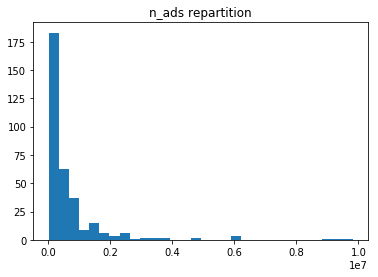

ad_price
mean = 53.4698565776459
quantile 5% : 10.832
quantile 25% : 22.360
quantile 75% : 71.450
quantile 95% : 145.770


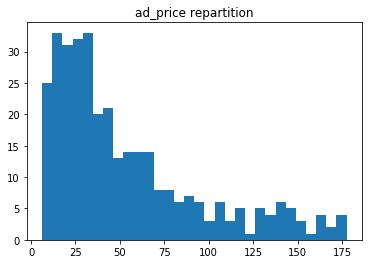

revenue
mean = 26224.480360640573
quantile 5% : 768.648
quantile 25% : 3531.264
quantile 75% : 32420.449
quantile 95% : 123003.014


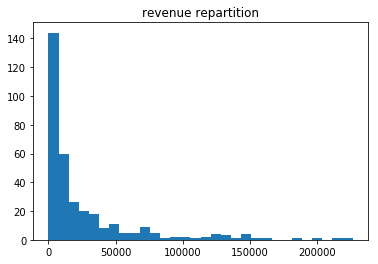

n_featured
mean = 5244.412462908012
quantile 5% : 153.000
quantile 25% : 706.000
quantile 75% : 6484.000
quantile 95% : 24600.200


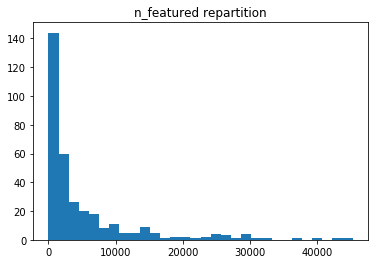

ratio_featured
mean = 0.8978257082582423
quantile 5% : 0.155
quantile 25% : 0.420
quantile 75% : 1.259
quantile 95% : 2.052


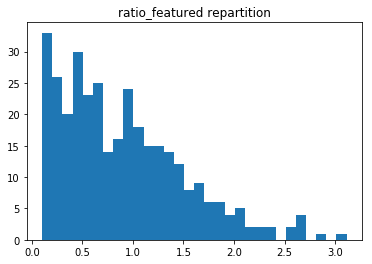

exchanged_money
mean = 31748939.289134514
quantile 5% : 885940.472
quantile 25% : 3582446.560
quantile 75% : 37082333.300
quantile 95% : 137976872.792


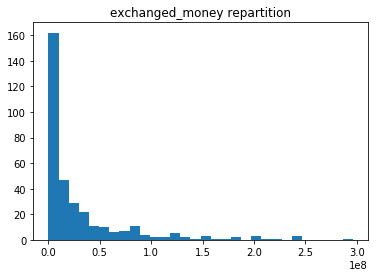

revenue_part
mean = 0.0008889186725187929
quantile 5% : 0.001
quantile 25% : 0.001
quantile 75% : 0.001
quantile 95% : 0.001


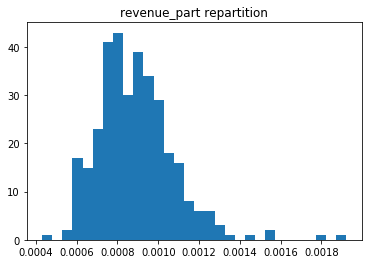

inflated_dist5
mean = 425.16693576481293
quantile 5% : 14.085
quantile 25% : 72.331
quantile 75% : 541.680
quantile 95% : 1670.188


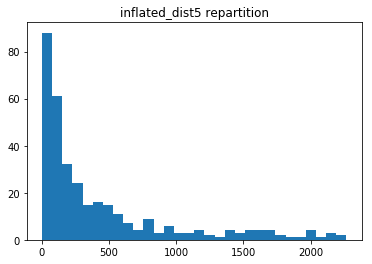

In [8]:
for col in data.columns:
    print(col)
    columns_analysis(data,col)

#### Correlation

In [9]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# plot correlation matrix

def disp_heat_map(data):
    corr = data.corr()
    cmap = sns.diverging_palette(0, 10, sep=20, n= 3, as_cmap=False)
    corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)
    
    # HeatMap
    fig, ax = plt.subplots(figsize=(10,10))
    cax=ax.matshow(corr,vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), [i for i in range(len(corr.columns))]);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()
    return corr
# End HeatMap

def very_correlated(data, threshold):
    '''all very correlated features'''
    col_corr = []
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr = np.abs(corr_matrix.iloc[i, j])
            if corr >= threshold:
                i_name,j_name = corr_matrix.columns[i], corr_matrix.columns[j] # getting the name of column
                col_corr.append((i_name,j_name,np.around(corr,3)))
    return col_corr

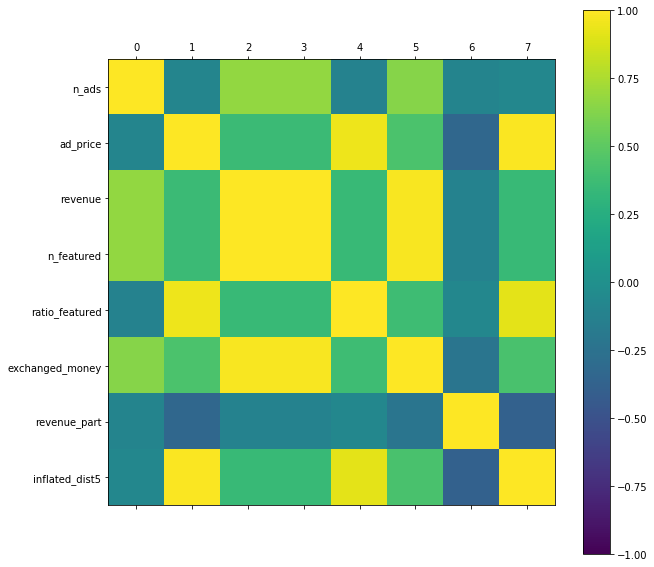

[('n_featured', 'revenue', 1.0),
 ('ratio_featured', 'ad_price', 0.95),
 ('exchanged_money', 'revenue', 0.977),
 ('exchanged_money', 'n_featured', 0.977),
 ('inflated_dist5', 'ad_price', 0.986),
 ('inflated_dist5', 'ratio_featured', 0.917)]

In [15]:
disp_heat_map(data)
very_correlated(data,0.8)

In [11]:
data.head()

,categorie,n_ads,ad_price,revenue,n_featured,ratio_featured,exchanged_money,revenue_part,inflated_dist5
0,accessories,446135,16.226667,9372.349974,1874.0,0.420052,7.239284e+06,0.001295,37.616314
3,Accessories & accessories,496293,21.740000,9786.574488,1957.0,0.394324,1.078941e+07,0.000907,68.490948
4,Accessories CDs,63256,12.570000,643.843384,128.0,0.202352,7.951279e+05,0.000810,20.827820
5,Accessories for men,1045250,36.630000,37032.317725,7406.0,0.708539,3.828751e+07,0.000967,177.888875
6,Accessories for women,1901626,38.640000,66547.537048,13309.0,0.699875,7.347883e+07,0.000906,195.112000


#### plot high correlation

In [12]:
from sklearn.linear_model import LinearRegression as LinReg
def compare(data, col1,col2, lin_reg = True):
    
    lr = LinReg()
    lr.fit(data[col1].values.reshape(-1,1),data[col2])
    
    plt.plot(data[col1],data[col2],".")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.plot(data[col1].values.reshape(-1,1),lr.predict(data[col1].values.reshape(-1,1)))
    plt.show()
    
def high_correlation_graph(data,threshold):
    very_corr = very_correlated(data,threshold)
    for (col1,col2,corr) in very_corr:
        if corr<1:
            print("correlation :",corr)
            compare(data,col1,col2)
            compare(data,col2,col1)

correlation : 0.95


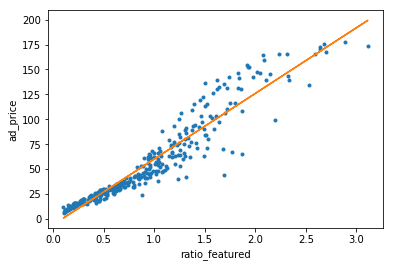

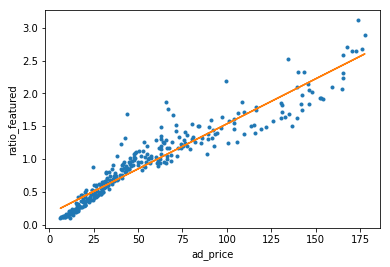

correlation : 0.977


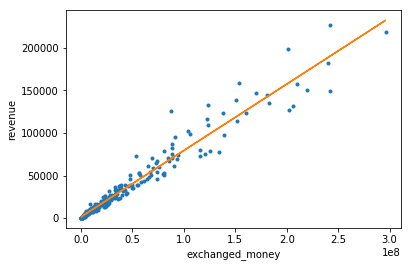

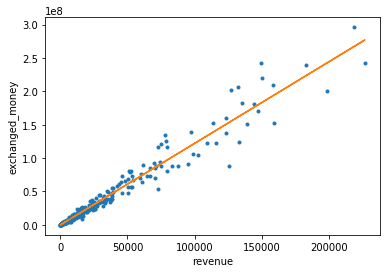

correlation : 0.977


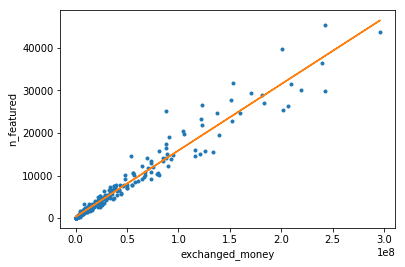

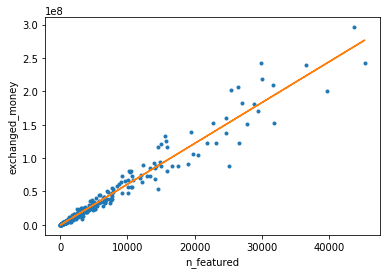

correlation : 0.986


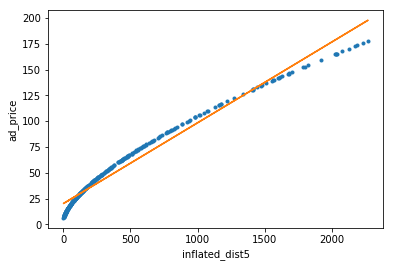

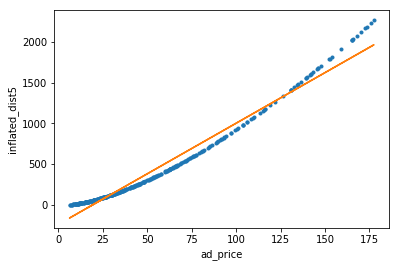

correlation : 0.917


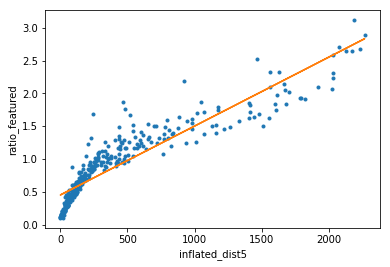

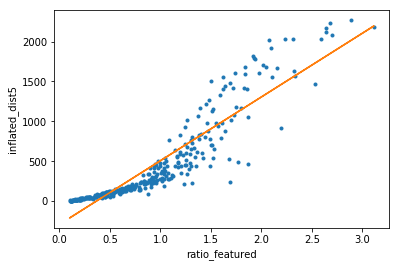

In [13]:
high_correlation_graph(data,0.8)

<h4>Among very correlated columns : </h4><br>
<u>ratio_featured - ad_price </u>: the higher is the price, the more featured ads you will obtain <b>in proportion</b>.<br>
<u>exchanged_money - revenue | n_featured </u>: to increase revenue, increase n_ads or increase price_ad. If it is quite obvious on n_ads, increasing the prices is not that clear. It is directly linked to the correlation between ratio_feature and ad_price

## Ideas for revenue optimization

<div>The main idea is that, the more the prices are high, the more people will opt for the promote feature<br>
We can test one thing : adapt the promotion feature to the price of the ad. When you post a 15\$-ad, it can be frustrating to spend 5\$ (ie 33% of your benefit) to promote it. And if you post a 150\$-ad, it is pretty obvious you will spend way more easily the 5\$.</div>

<div class="alert-success" style="padding:10px">Benefits to adapt the price of the promotion feature :
    <ul>
        <li>People posting low-price ads may opt more easily for the promote feature.</li>
        <i> $\rightarrow$ Check if the ratio increases</i>
        <li>People posting high-price ads will see a decreasing price for the promotion, motivating them to post higher-price ads. For example, we can do 5% of the price instead of 10% when the ad is higher than a given threshold.</li>
        <i> $\rightarrow$ We could do tests on that threshold </i>
        <li>We can introduce "bundle price", adapt to the price of the bundle to have a reduction on the promotion of every articles. Then, we can push low-price ad posters to promote their articles.</li>
    </ul>
</div>
          
      
     
<div class="alert-danger" style="padding:10px">Disadvantages  :
    <ul>
        <li>Maybe it will increase the ratio of people spending money on the feature, but it may reduce the revenue ! </li>
        <i> $\rightarrow$ Check if the revenue increases</i>
        <li>People posting high-price ads may be discouraged by paying more. As a result, the ratio may decrease, and the revenue may decrease. More than that, people will tend to post low-price ads : data showed it is the less money-making ads.</li>
        <li>If the feature is more affordable, there may be an overload. If too much ads are promoted, the promotion may be devalued.</li>
      <div>
          
        